# Análisis Exploratorio de Datos
Se procederá a realizar el análisis exploratorio de los datos relacionados con las conexiones a Internet en Argentina suministrado por el Ente Nacional de Comunicaciones ENACOM.

# EDA Información Internet

In [1]:
#Iniciamos con el análisis de la información de los porcentajes de acceso a internet por provincia
# Hoja: Velocidad % por prov
import pandas as pd
velocidad_provincia = pd.read_excel(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 2\Internet.xlsx", sheet_name = 3)
velocidad_provincia.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [2]:
#Verificamos presencia de valores nulos y los tipos de datos
velocidad_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


Para la información contenida en esta hoja no indentificados datos nulos y los tipos de datos son correctos

In [3]:
#Veremos uns descripción general de las variables en esta hoja de datos
velocidad_provincia.describe(include="all")

,Año,Trimestre,Provincia,Mbps (Media de bajada)
count,1008.000000,1008.000000,1008,1008.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,42,NaN
mean,2018.761905,2.452381,NaN,24.720245
std,3.039439,1.117574,NaN,33.660764
min,2014.000000,1.000000,NaN,2.573729
25%,2016.000000,1.000000,NaN,4.866698
50%,2019.000000,2.000000,NaN,10.089315
75%,2021.000000,3.000000,NaN,29.875292


Se identifica que existe información desde el año 2014 al año 2024 acerca de las 24 provincias del país de Argentina. En cuanto a los valores de la velocidad (media de bajada) se identifica un promedio de 24.7 Mbps para todas las observaciones, es decir, contando todos los datos desde el 2014 al 2024.

In [4]:
#Vamos a obtener el valor promedio de velocidad por provincia y por año para realizar un análisis de la evolución
import numpy as np
vel_prov_prom = velocidad_provincia.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()
vel_prov_prom.head()

,Año,Provincia,Mbps (Media de bajada)
0,2014,Buenos Aires,3.938247
1,2014,Capital Federal,4.373310
2,2014,Catamarca,2.992319
3,2014,Chaco,3.528954
4,2014,Chubut,3.168178


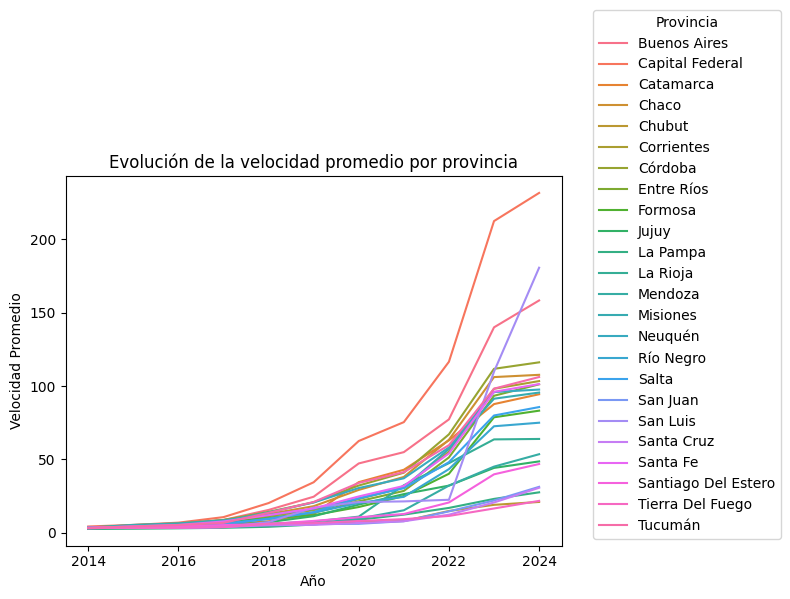

In [5]:
#Se procede a realizar un grafico de la evolución por año por provincias
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=vel_prov_prom, x='Año', y='Mbps (Media de bajada)', hue='Provincia')
plt.title('Evolución de la velocidad promedio por provincia')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

De acuerdo a lo observado en el gráfico todas las provincias inician con valores de velocidad promedio bajos en el 2014 y que estos van aumentando hasta hacerse diferencias notorias entre provincias a partir del año 2019. Para el año 2024 las provincias que cuentan con mayor velocidad promedio son Capital Federal, San Luis y Buenos Aires. En esta gráfica se identifica a San Luis como una provincia cuyo aumento promedio de velocidad fue muy amplio entre el año 2022 al 2024, en comparación con los aumentos de las demás provincias en este mismo periodo de tiempo, que fueron menores. Se procede a revisar númericamente los promedios anuales de esta privincia.

In [6]:
vel_prov_prom_1= vel_prov_prom[vel_prov_prom["Provincia"] == "San Luis"]
vel_prov_prom_1.head(11)

,Año,Provincia,Mbps (Media de bajada)
18,2014,San Luis,3.503414
42,2015,San Luis,3.502364
66,2016,San Luis,3.502683
90,2017,San Luis,4.060311
114,2018,San Luis,7.357230
138,2019,San Luis,17.254677
162,2020,San Luis,21.028222
186,2021,San Luis,21.466175
210,2022,San Luis,22.567500
234,2023,San Luis,109.812500


Según la información en la tabla anterior, se identifica que el aumento de la velocidad promedio del año 2022 al 2023 fue de aproximandamente del 386%, sin embargo, no podríamos indicar que es un valor átipico porque no conocemos los cambios que se hayan presentado en la provincia a nivel de inversión de infraestructura y/o actualización tecnologica que conlleven a este resultado, adicionando a esto, la confiabilidad de la fuente de información, tomaremos el dato como normal (tipico).

Vamos a identificar las provincias con los valores más bajos y más altos de velocidad promedio para el año 2024.

In [7]:
vel_prov_prom_2024 = vel_prov_prom[vel_prov_prom["Año"]== 2024]
vel_prov_prom_2024 = vel_prov_prom_2024.sort_values("Mbps (Media de bajada)", ascending=True)
vel_prov_prom_2024.head(5)

,Año,Provincia,Mbps (Media de bajada)
244,2024,Chubut,21.085
262,2024,Tierra Del Fuego,21.815
250,2024,La Pampa,27.640
259,2024,Santa Cruz,30.745
257,2024,San Juan,31.375


Las 5 provincias con valores más bajos de velocidad promedio en 2024 son Cubut, Tierra del Fuego, La Pampa, Santa Cruz, San Juan.

In [8]:
#Vamos a identificar las 5 pronvincias con los valores más altos de velocidad promedio 2024
vel_prov_prom_2024 = vel_prov_prom_2024.sort_values("Mbps (Media de bajada)", ascending=False)
vel_prov_prom_2024.head(5)

,Año,Provincia,Mbps (Media de bajada)
241,2024,Capital Federal,231.475
258,2024,San Luis,180.550
240,2024,Buenos Aires,158.270
246,2024,Córdoba,116.140
243,2024,Chaco,107.635


Las 5 provincias con valores más altos de velocidad promedio en 2024 son: Capital Federal, San Luis, Buenos Aires, Córdoba, Chaco.
Esta información podría ser util para identificar provincias donde se requiera intervención a nivel de infraestructura para mejorar las velocidades y/o enfocar esfuerzos donde hay más demanda de velocidad, como en las mencionadas al principio de este parrafo.

In [9]:
#Seguimos con el análisis de los los totales de velocidad media descargada (VMD) por región.
# Hoja: Totales VMD
totalvmd = pd.read_excel(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 2\Internet.xlsx", sheet_name = 4)
totalvmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [10]:
#Verificamos presencia de valores nulos y los tipos de datos
totalvmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Para los datos en este conjunto, no se identifican valores nulos y los tipos de datos son correctos

In [11]:
#Veremos uns descripción general de las variables en esta hoja de datos
totalvmd.describe(include="all")

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
count,42.000000,42.000000,42.000000,42
unique,NaN,NaN,NaN,42
top,NaN,NaN,NaN,Abr-Jun 2024
freq,NaN,NaN,NaN,1
mean,2018.761905,2.452381,39.334762,NaN
std,3.074756,1.130560,43.643195,NaN
min,2014.000000,1.000000,3.617127,NaN
25%,2016.000000,1.250000,6.038428,NaN
50%,2019.000000,2.000000,18.855000,NaN
75%,2021.000000,3.000000,51.370000,NaN


Podemos observar que las media de bajada se encuentran entre 3.6Mbps y 139.5 Mbps que el 25% de los datos son velocidades media de bajadas mayores a 51.37, vamos verificar si estos velocidades más altas se encuentran en los años más recientes, corroborando el comportamiento evidenciado con la tendencia a la alza de la variable anterior (Velocidad % por provincia)

In [ ]:
#Vamos a obtener el valor promedio de velocidad por año para realizar un análisis de la evolución
totalvmd_prom = velocidad_provincia.groupby(['Año'])['Mbps (Media de bajada)'].mean().reset_index()
totalvmd_prom.head()

,Año,Mbps (Media de bajada)
0,2014,3.399800
1,2015,4.126699
2,2016,4.786862
3,2017,6.325486
4,2018,9.740753


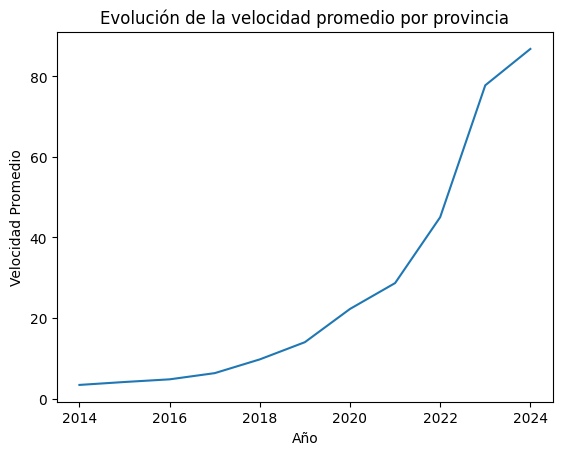

In [13]:
#Se procede a realizar un grafico de la evolución por año
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=totalvmd_prom, x='Año', y='Mbps (Media de bajada)')
plt.title('Evolución de la velocidad promedio por provincia')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio')
# Mostrar el gráfico
plt.show()

En este gráfico se puede observar la tendencia a la alza que ha tenido esta variable en el tiempo, lo que nos indica que a nivel general la velocidad media de descargada en el país ha alcanzado los niveles más altos del 2020 en adelante, en comparación con 10 años atrás esta velocidad es aproximadamente 45 veces mayor.

A cotinuación, se procederá a  realizar el análisis de la información sobre los datos de acceso a internet por tecnología.

In [14]:
tecnologias = pd.read_excel(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 2\Internet.xlsx", sheet_name = 5)
tecnologias.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [15]:
#Verificamos presencia de valores nulos y los tipos de datos
tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


En este conjunto de datos, no hay presencia de valor nulos y los tipo de datos son correctos.

In [18]:
#veremos una descripción general de todas las variables
pd.set_option('display.float_format', '{:.2f}'.format)
tecnologias.describe(include="all")

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abr-Jun 2024
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,2018.76,2.45,2694843.86,4433906.00,1224693.57,304293.21,158186.07,8815922.71,NaN
std,3.07,1.13,1094346.63,1319783.05,1321135.97,203202.40,82363.51,1733188.75,NaN
min,2014.00,1.00,733491.00,2407330.00,139187.00,70749.00,54300.00,6398398.00,NaN
25%,2016.00,1.25,1730869.00,3146291.75,171941.00,85390.50,70430.00,7218130.75,NaN
50%,2019.00,2.00,3061623.00,4535507.00,698946.50,292223.00,185221.00,8720658.00,NaN
75%,2021.00,3.00,3713297.50,5857192.25,1945689.00,515434.00,244069.50,10388730.75,NaN


Según esta información, la tecnología que tiene mayores accesos en promedio durante los años 2014 - 2024 es cablemodem y luego le digue la tecnología ADSL. 
Procedemos a verificar como ha sido el comportamiento de los accesos por tecnología a lo largo de esta temporalidad.

In [19]:
#Vamos a obtener el valor promedio de accesos por tecnologia  y por año para realizar un análisis de la evolución
#Para lo que vamos a trasponer los datos a formato largo
tecnologias.drop("Periodo", axis=1, inplace=True) #Eliminaremos la columna Periodo
tecnologias.drop("Total", axis=1, inplace=True) #Eliminaremos la columna Total
tecnologias = pd.melt(tecnologias, id_vars=["Año", "Trimestre"], var_name="Tipo de Tecnología", value_name="Accesos")
tecnologias.head()

,Año,Trimestre,Tipo de Tecnología,Accesos
0,2024,2,ADSL,733491
1,2024,1,ADSL,774475
2,2023,4,ADSL,836390
3,2023,3,ADSL,897895
4,2023,2,ADSL,1006509


In [21]:
#Luego crearemos un nuevo data set solo con los valores promedio por año por tipo de tecnologia
tecnologias_prom = tecnologias.groupby(['Año',"Tipo de Tecnología"])["Accesos"].mean().reset_index()
tecnologias_prom.head()

,Año,Tipo de Tecnología,Accesos
0,2014,ADSL,3721187.50
1,2014,Cablemodem,2493771.75
2,2014,Fibra óptica,151215.50
3,2014,Otros,71675.00
4,2014,Wireless,76308.50


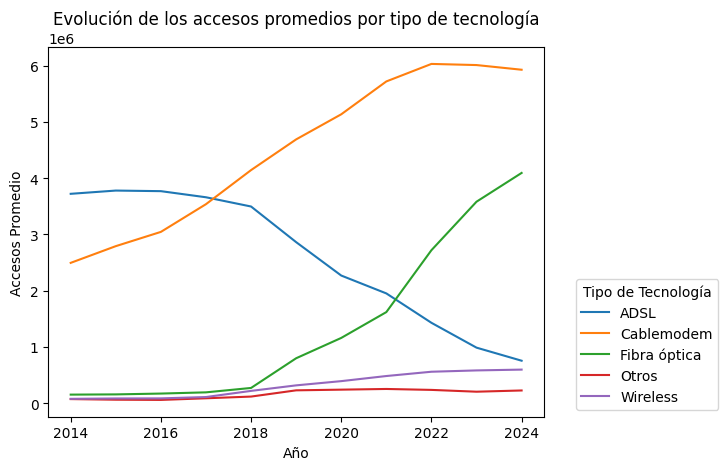

In [22]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia 
sns.lineplot(data=tecnologias_prom, x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

En este grafico se puede observar como la tecnología fibra optima ha evidenciado un aumento en los accesos a partir del año 2020, año en que las velocidades medias de bajada empezaron a acrencentar, lo que podría explicar este efecto. Por otra parte la teconología cablemodem, presento una tendencia a la subida entre 2016  y 2022 donde alcanzó su punto más alto, a partir de ahí la cantidad de accesos se ha mantenido constante (entre 2022 - 2024). Por otro lado la tecnolodía ADSL ha disminuido el número de accesos, mientras que wireless y otras tecnologías se han mantenido constantes.

Ahora vamos a evaluar la cantidad de accesos por tecnologías pero en su detallado por provincia.

In [41]:
tecnologias_prov = pd.read_excel(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 2\Internet.xlsx", sheet_name = 6)
tecnologias_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055,2722466,1849476,138638,64745,4989380
1,2024,2,Capital Federal,54102,1144781,230402,4493,29821,1463599
2,2024,2,Catamarca,4951,10303,58355,1384,81,75074
3,2024,2,Chaco,9448,57935,68944,8407,2358,147092
4,2024,2,Chubut,25955,80704,26516,31118,9930,174223


In [42]:
#Verificamos presencia de valores nulos y los tipos de datos
tecnologias_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   object
 1   Trimestre     1007 non-null   object
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
 8   Total         1007 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 70.9+ KB


En este conjunto de datos, no se evidencian datos nulos, vamos a corregir los tipos de datos de las columnas: Año y trimestre a tipo numerico

In [48]:
tecnologias_prov["Año"] = tecnologias_prov["Año"].astype(str)
tecnologias_prov["Año"] = tecnologias_prov["Año"].str[:4] #Convertimos a string para extraer los 4 primeros caracteres
tecnologias_prov["Año"] = tecnologias_prov["Año"].astype(int) #Luego convertir exitosamente a tipo int

In [50]:
tecnologias_prov["Trimestre"] = tecnologias_prov["Trimestre"].astype(str)
tecnologias_prov["Trimestre"] = tecnologias_prov["Trimestre"].str[0] #Convertimos a string para extraer el primer caracter
tecnologias_prov["Trimestre"] = tecnologias_prov["Trimestre"].astype(int) #Luego convertir exitosamente a tipo int

In [52]:
tecnologias_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   int64 
 1   Trimestre     1007 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
 8   Total         1007 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.9+ KB


Se han corregido los tipos de datos.

In [53]:
#Vamos a obtener el valor promedio de accesos por tecnologia, por provincia y por año para realizar un análisis de la evolución
#Para lo que vamos a trasponer los datos a formato largo
tecnologias_prov.drop("Total", axis=1, inplace=True) #Eliminaremos la columna Total
tecnologias_prov = pd.melt(tecnologias_prov, id_vars=["Año", "Trimestre", "Provincia"], var_name="Tipo de Tecnología", value_name="Accesos")
tecnologias_prov.head()

,Año,Trimestre,Provincia,Tipo de Tecnología,Accesos
0,2024,2,Buenos Aires,ADSL,214055
1,2024,2,Capital Federal,ADSL,54102
2,2024,2,Catamarca,ADSL,4951
3,2024,2,Chaco,ADSL,9448
4,2024,2,Chubut,ADSL,25955


In [54]:
#Luego crearemos un nuevo data set solo con los valores promedio por año por tipo de tecnologia por provincia
tecnologias_prom_prov = tecnologias_prov.groupby(['Año',"Tipo de Tecnología","Provincia"])["Accesos"].mean().reset_index()
tecnologias_prom_prov.head()

,Año,Tipo de Tecnología,Provincia,Accesos
0,2014,ADSL,Buenos Aires,1568769.25
1,2014,ADSL,Capital Federal,449786.50
2,2014,ADSL,Catamarca,24519.50
3,2014,ADSL,Chaco,53659.25
4,2014,ADSL,Chubut,49973.50


In [55]:
tecnologias_prom_prov["Tecnologia+Prov"] = tecnologias_prom_prov["Tipo de Tecnología"] + tecnologias_prom_prov["Provincia"]
tecnologias_prom_prov.head()

,Año,Tipo de Tecnología,Provincia,Accesos,Tecnologia+Prov
0,2014,ADSL,Buenos Aires,1568769.25,ADSLBuenos Aires
1,2014,ADSL,Capital Federal,449786.50,ADSLCapital Federal
2,2014,ADSL,Catamarca,24519.50,ADSLCatamarca
3,2014,ADSL,Chaco,53659.25,ADSLChaco
4,2014,ADSL,Chubut,49973.50,ADSLChubut


In [56]:
#Verificamos los tipos de datos de este nuevo dataset
tecnologias_prom_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 1320 non-null   int64  
 1   Tipo de Tecnología  1320 non-null   object 
 2   Provincia           1320 non-null   object 
 3   Accesos             1320 non-null   float64
 4   Tecnologia+Prov     1320 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 51.7+ KB


En este EDA vamos a graficar la evolución de las provincias con mayores velocidades media de descarga y las menores velocidades media de descarga, pero en el Tablero Dinámico si vamos a poder explorar más detalle sobre esta información.

Mayores velocidades de descarga: Capital Federal, San Luis, Buenos Aires

Menores velocidades de descarga: Chubut, Tierra de Fuego, La Pampa

In [61]:
tecnologias_prom_prov["Provincia"] = tecnologias_prom_prov["Provincia"].astype(str)

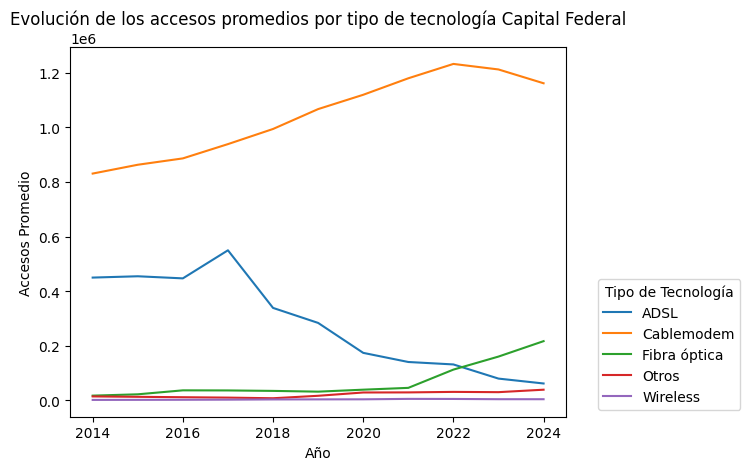

In [ ]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia en la provincia Capital Federal
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "Capital Federal"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología Capital Federal')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

En esta provincia se da mayoritariamente accesos por Cablemodem y la fibra optica viene en incremento a partir del año 2021. La tecnología ADSL viene en disminución, como se envidenció a nivel general.

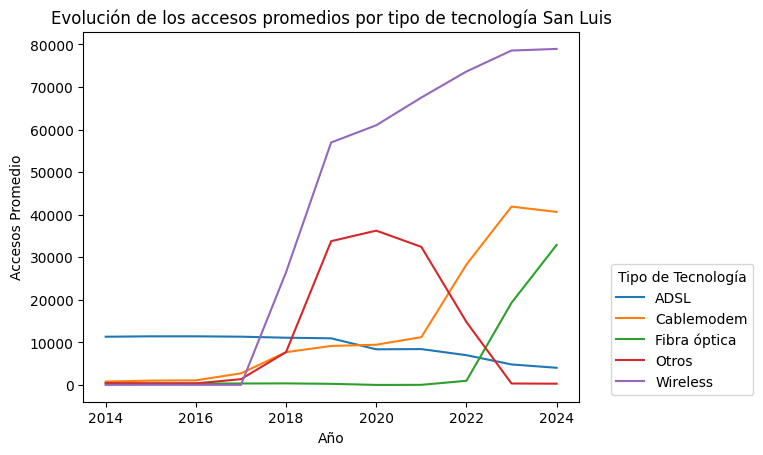

In [ ]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia en la provincia San Luis
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "San Luis"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología San Luis')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

La tecnología Wireless se posiciona como la más utilizada en San Luis, en segundo lugar Cablemodem y un creciente crecimiento de Fibra optica. Entre los años 2018 - 2021 otras tecnologias ocuparon el segundo lugar con el mayor de los accesos en esta provincia, pero a partir del 2021 cayó el uso de las mismas.

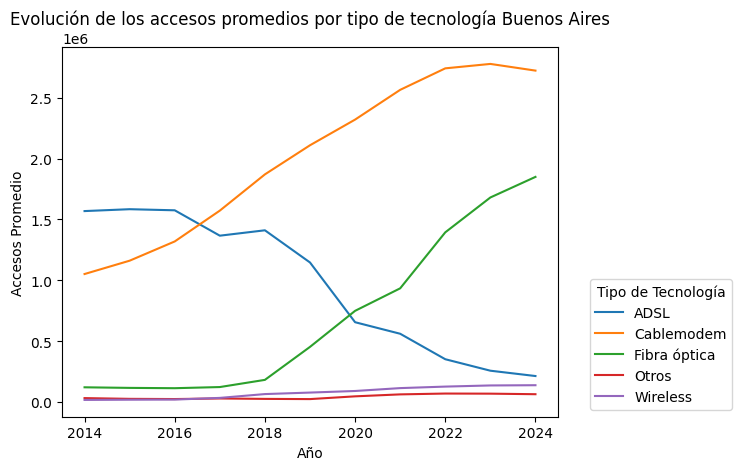

In [ ]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia  en la provincia Buenos Aires
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "Buenos Aires"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

El uso de las tecnologías en la provincia Buenos Aires es siminar al comportamiento de los accesos por tecnologias en Capital Federal

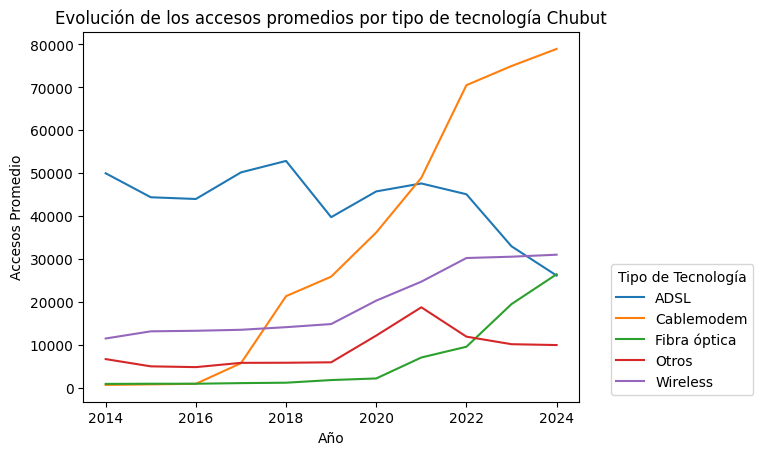

In [67]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia en la provincia Chubut
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "Chubut"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología Chubut')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

En esta provincia los accesos por la tecnología cable modem está posicionados, en en el año 2024 la cantidad de accesos por ADSL y Fibra óptica están aproximadamente iguales. El ADSL ha venido con tendencia a la baja pero sigue siendo una tecnología bastante usada, mientras que los accesos por Fibra optica han venido en aumento, aunque para el año 2023-2024 la segunda tecnología más usada es el Wireless

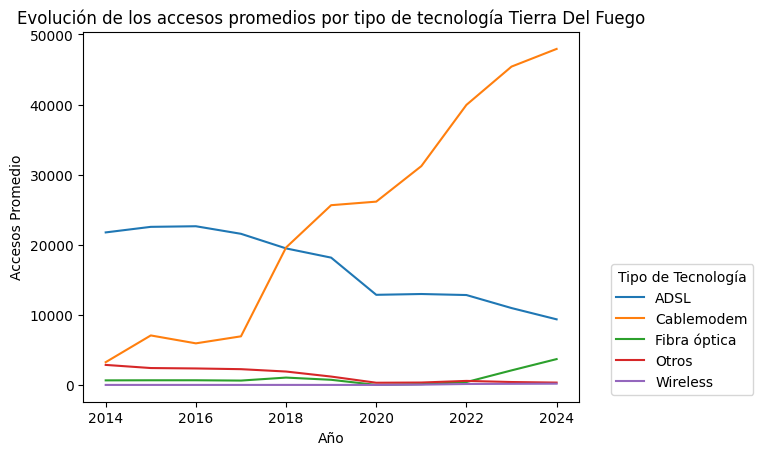

In [69]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia en la provincia Tierra delFuego
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "Tierra Del Fuego"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología Tierra Del Fuego')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

En esta provincia se evidencia el cablemodem como tecnología posicionada, en segundo lugar el ADSL, aunque viene con una tendencia a la baja.

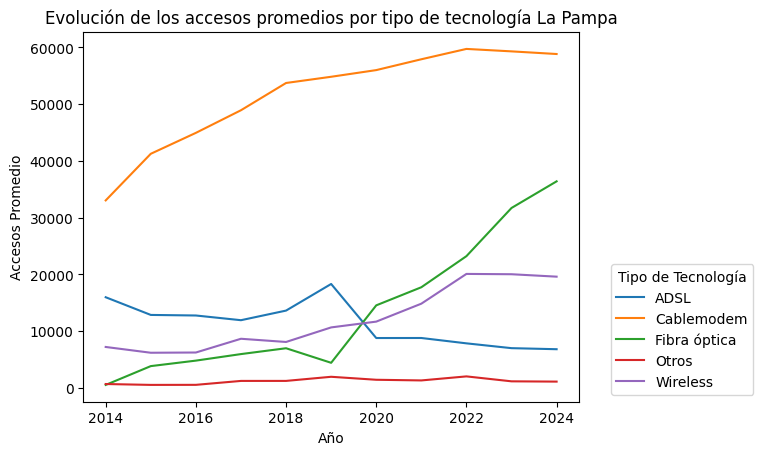

In [70]:
#Se procede a realizar un grafico de la evolución por año de los accesos por tipo de tecnologia en la provincia La Pampa
sns.lineplot(data=tecnologias_prom_prov[tecnologias_prom_prov["Provincia"] == "La Pampa"], x='Año', y='Accesos', hue='Tipo de Tecnología')
plt.title('Evolución de los accesos promedios por tipo de tecnología La Pampa')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 0), loc='lower left')
# Mostrar el gráfico
plt.show()

Al igual que en la anterior provincia la tecnología más posicionada es el Cablemodem, en segundo lugar, a partir del año 2020, se encuentran los accesos por fibra óptica que ha venido con una tendencia al aumento.
Como se pudo ver, la tecnología más utilizada en las provincias, tanto de mayor como de menores velocidades medias de descarga, es cablemodem.

Se continua con el análisis de la penetraciones totales de internet:

In [71]:
penetracion = pd.read_excel(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 2\Internet.xlsx", sheet_name = 9)
penetracion.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [73]:
penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


En este conjunto de datos no se evidencian datos nulos y los tipos de datos son correctos

In [74]:
#Vamos a eliminar la columna periodo
penetracion.drop(["Periodo"], axis=1, inplace=True)

In [77]:
#Vamos a calcular la pentración promedio por año para realizar el análisis de tendencia
penetracion_prom = penetracion.groupby(['Año']).mean().reset_index()
penetracion_prom.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2014,2.50,50.14,15.26
1,2015,2.50,52.05,15.92
2,2016,2.50,53.21,16.34
3,2017,2.50,55.94,17.21
4,2018,2.50,60.02,18.52


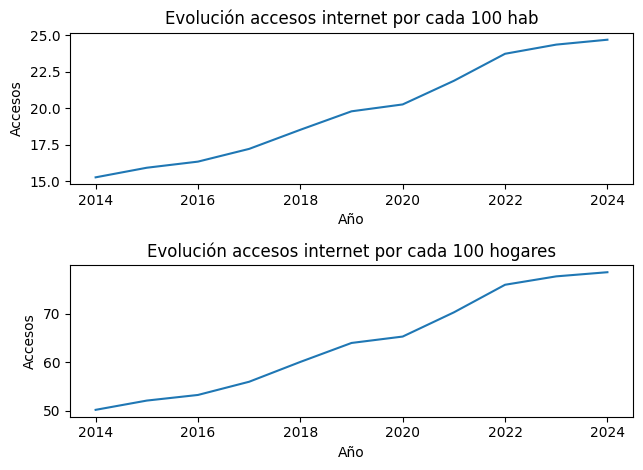

In [86]:
#Vamos a graficar la tendencias
fig, axes = plt.subplots(nrows=2, ncols=1)
#Definimos las x y y para el grafico
x= penetracion_prom["Año"]
y1=penetracion_prom["Accesos por cada 100 hab"]
y2= penetracion_prom["Accesos por cada 100 hogares"]

# Graficar en el primer subplot
axes[0].plot(x, y1)
axes[0].set_title('Evolución accesos internet por cada 100 hab')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Accesos')

# Graficar en el segundo subplot
axes[1].plot(x, y2)
axes[1].set_title('Evolución accesos internet por cada 100 hogares')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Accesos')

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()


El comportamiento de los accesos por cada 100 habitantes es similar al comportamiento de los accesos por cada 100 hogares, lo que nos podría indicar que  la accesibilidad individual al servicio es similar al la adopción del servicio a nivel hogar.